<h1> Selecting the best place for a new restaurant in Toronto </h1>

We import the libraries that we are going to use:

In [1]:
import pandas as pd
import numpy as np

Now we are going to scrap the list of postal codes:

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
table = pd.read_html(url)[0]
table.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


We replace the values "Not Assigned" with np.NaN and then we delete all the rows with a value equal to np.NaN in cloumn "Borough"

In [3]:
table = table.replace("Not assigned", np.NaN)
table.dropna(subset=["Borough"], axis=0, inplace=True)

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough:

In [4]:
for i in range(table.shape[0]):
    if table.iloc[i,2]==np.NaN:
        table.iloc[i,2]==table.iloc[i,1]

Now we reset the index:

In [5]:
table.reset_index(drop=True)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
5,M7A,Downtown Toronto,Queen's Park
6,M9A,Queen's Park,NaN
7,M1B,Scarborough,Rouge
8,M1B,Scarborough,Malvern
9,M3B,North York,Don Mills North


In [6]:
table.shape

(210, 3)

In [7]:
table["Neighbourhood"] = table["Neighbourhood"].astype("str")

In [8]:
table = table.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()

In [9]:
table.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


And finally we show the shape of the dataframe:

In [10]:
table.shape

(103, 3)

We import the given csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

In [402]:
!wget -O file.csv -q  'http://cocl.us/Geospatial_data'
df_coordinates = pd.read_csv('file.csv')
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
df_coordinates.shape

(103, 3)

Now we will rename the column 'Postal Code' so we can merge the dataframe with postal codes (we called it "table") with the one that contains the coordinates of the postal codes from Toronto:

In [13]:
df_coordinates.rename(columns={'Postal Code':'Postcode'}, inplace=True)

We merge the two dataframes by the column "Postcode"

In [14]:
df_merge = pd.merge(table, df_coordinates, on="Postcode" )

This is the result:

In [15]:
df_merge.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [16]:
df_merge.shape

(103, 5)

Now we have a dataframe with 103 locations where we will look for existent restaurants and other types of venues.

Let's see how many boroughs and neighborhoods do we have:

In [17]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_merge['Borough'].unique()),
        len(df_merge['Neighbourhood'].unique())
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


And now we are going to install and import some additional libraries that we are going to use in this section.

In [19]:
#!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from sklearn.cluster import KMeans
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

Let's see what are the geographical coordinates of Toronto:

In [29]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [30]:
CLIENT_ID = '...' # your Foursquare ID
CLIENT_SECRET = '...' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Let's explore the first neighborhood in our dataframe.
Get the neighborhood's name.

In [31]:
df_merge.loc[0, 'Neighbourhood']

'Rouge, Malvern'

Get the neighborhood's latitude and longitude values.

In [32]:
neighborhood_latitude = df_merge.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_merge.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_merge.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge, Malvern are 43.806686299999996, -79.19435340000001.


Now, let's get all the venues (with a high limit of 1000) that are in Marble Hill within a radius of 3000 meters.
First, let's create the GET request URL. Name your URL url.

In [49]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


Send the GET request and examine the resutls:

In [48]:
import requests # library to handle requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e55c01c0f596835c37202d7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 73,
  'suggestedBounds': {'ne': {'lat': 43.833686327000024,
    'lng': -79.15701048438243},
   'sw': {'lat': 43.77968627299997, 'lng': -79.2316963156176}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cd854fd3ec4b1f71900be3f',
       'name': 'African Rainforest Pavilion',
       'location': {'lat': 43.81772505914066,
        'lng': -79.18343284457424,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.81772505914066,
          'lng': -79.183432844574

In [35]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [36]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,African Rainforest Pavilion,Zoo Exhibit,43.817725,-79.183433
1,Toronto Pan Am Sports Centre,Athletics & Sports,43.790623,-79.193869
2,Toronto Zoo,Zoo,43.820582,-79.181551
3,Polar Bear Exhibit,Zoo,43.823372,-79.185145
4,Australasia Pavillion,Zoo Exhibit,43.822563,-79.183286


In [37]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

73 venues were returned by Foursquare.


In [40]:
nearby_venues.to_csv("nearby_venues.csv", sep='\t')

In [45]:
import base64
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "nearby_venues.csv"):
    csv = nearby_venues.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

download_df = pd.DataFrame(data = [[1,2],[3,4]], columns=['Col 1', 'Col 2'])
create_download_link(download_df)

<h2> Explore Neighborhoods in Toronto </h2>
Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now let's write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [51]:
toronto_venues = getNearbyVenues(names=df_merge['Neighbourhood'],
                                   latitudes=df_merge['Latitude'],
                                   longitudes=df_merge['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

Let's check the size of the resulting dataframe:

In [52]:
def create_download_link( df, title = "Download CSV file", filename = "toronto_venues.csv"):
    csv = toronto_venues.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

download_df = pd.DataFrame(data = [[1,2],[3,4]], columns=['Col 1', 'Col 2'])
create_download_link(download_df)

In [53]:
print(toronto_venues.shape)
toronto_venues.head()

(2225, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Marina Spa,43.766000,-79.191000,Spa


Let's check how many venues were returned for each neighborhood:

In [54]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",10,10,10,10,10,10
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Downsview North, Wilson Heights",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,56,56,56,56,56,56


Next, we are going to separate and count all the restaurants and all the venues non-restaurant:

In [67]:
df_not_restaurant = toronto_venues.loc[~toronto_venues['Venue Category'].str.contains('Restaurant')]

In [68]:
df_restaurant = toronto_venues.loc[toronto_venues['Venue Category'].str.contains('Restaurant')]

In [374]:
df_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
12,Woburn,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean Restaurant
13,Woburn,43.770992,-79.216917,Al-Hamd Biryani & Pizza,43.767585,-79.219570,Indian Restaurant
14,Cedarbrae,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant


We are going to count how many restaurants there are in each neighborhood and how many venues non-restaurants.

In [383]:
df_restaurant.columns = ['Neighborhood', 'NeighLat', 'NeighLon', 'Venue', 'VenueLat', 'VenueLong', 'VenueCat']

In [118]:
cr = df_restaurant.groupby('Neighborhood').count()
cr.columns = ['Restaurants', '1', '2', '3', '4', '5']
cr.drop(['1', '2', '3', '4', '5'], axis=1, inplace=True)
cr.head()

,Restaurants
Neighborhood,
"Adelaide, King, Richmond",31
Agincourt,1
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",1
"Bathurst Manor, Downsview North, Wilson Heights",4
Bayview Village,2


In [132]:
cnr = df_not_restaurant.groupby('Neighborhood').count()
cnr.columns = ['Other_Venues', '1', '2', '3', '4', '5']
cnr.drop(['1', '2', '3', '4', '5'], axis=1, inplace=True)
cnr.head()

,Other_Venues
Neighborhood,
"Adelaide, King, Richmond",69
Agincourt,3
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",9
"Alderwood, Long Branch",10


In [426]:
df_outer = pd.merge(cr, cnr, on='Neighborhood', how='outer')
df_outer.reset_index(level=0, inplace=True)
df_outer.loc[df_outer['Neighborhood']=='Agincourt North, L\'Amoreaux East, Milliken, Steeles East']

,Neighborhood,Restaurants,Other_Venues
65,"Agincourt North, L'Amoreaux East, Milliken, St...",NaN,3.0


Let's check how many NaN values do we have and let's solve them:

In [427]:
df_outer.shape

(100, 3)

In [428]:
df_outer.isna().sum()

Neighborhood     0
Restaurants     35
Other_Venues     1
dtype: int64

In [429]:
df_outer.dropna(subset=["Other_Venues"], axis=0, inplace=True)

In [430]:
df_outer.isna().sum()

Neighborhood     0
Restaurants     35
Other_Venues     0
dtype: int64

In [431]:
df_outer["Restaurants"]=df_outer["Restaurants"].replace(np.nan, 0)
df_outer.isna().sum()

Neighborhood    0
Restaurants     0
Other_Venues    0
dtype: int64

Now, for each neighborhood, we are going to calculate the number of non-restaurant venues per restaurant do we have if we open a new restaurant there.
We are going to order the neighborhood by the Rate column in descending order and we are going to take the top ten neighborhoods.

In [432]:
df_outer['Rate+1'] = df_outer.apply(lambda row: (row.Other_Venues)/(row.Restaurants+1), axis = 1) 

In [472]:
df_outer.sort_values(by='Rate+1', ascending=False, axis=0, inplace=True)
pd.options.display.width = 500
df_outer.head()

,Neighborhood,Restaurants,Other_Venues,Rate+1
70,"CN Tower, Bathurst Quay, Island airp...",0.0,17.0,17.0
66,"Alderwood, Long Branch",0.0,10.0,10.0
72,"Clairlea, Golden Mile, Oakridge",0.0,10.0,10.0
68,"Bloordale Gardens, Eringate, Marklan...",0.0,8.0,8.0
25,"Dovercourt Village, Dufferin",1.0,16.0,8.0


In [456]:
df_outer.iloc[0,0]

'CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara'

Let's find out how many unique categories can be curated from all the returned venues

In [213]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 266 uniques categories.


<h2> Analyze Each Neighborhood </h2>

In [214]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [215]:
toronto_onehot.shape

(2225, 266)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [279]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.shape

(100, 266)

In [280]:
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.01,0.0,0.01
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.1,0.0,0.0,0.00,0.0,0.00
4,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00


Let's agregate all the Restaurants columns.

In [281]:
toronto_grouped2 = toronto_grouped.iloc[:, lambda toronto_goruped: toronto_grouped.columns.str.contains('Restaurant',case=False)]

In [282]:
toronto_grouped2.head()

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.0,0.02,0.02,0.0,0.01,0.0,0.0,0.0,0.01,0.0,...,0.01,0.04,0.02,0.0,0.03,0.0,0.04,0.0,0.02,0.0
1,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
2,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
3,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
4,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0


In [283]:
toronto_grouped2['Restaurants'] = toronto_grouped2.sum(axis=1)
toronto_grouped2.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(100, 50)

In [62]:
# Let's confirm the new size

toronto_grouped.shape

(100, 266)

In [344]:
# dataframe without (~) Restaurant columns
toronto_grouped3=toronto_grouped.loc[:,~toronto_grouped.columns.str.contains('Restaurant')]

In [345]:
toronto_grouped3['Restaurants']  = toronto_grouped2['Restaurants'].values
toronto_grouped4=toronto_grouped3.loc[:,~toronto_grouped3.columns.str.contains('Neighborhood')]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


We can see in the las column that we have a new column Restaurants that contains all the information related to restaurants.

In [346]:
toronto_grouped4.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Restaurants
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.31
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.0,0.00,0.10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


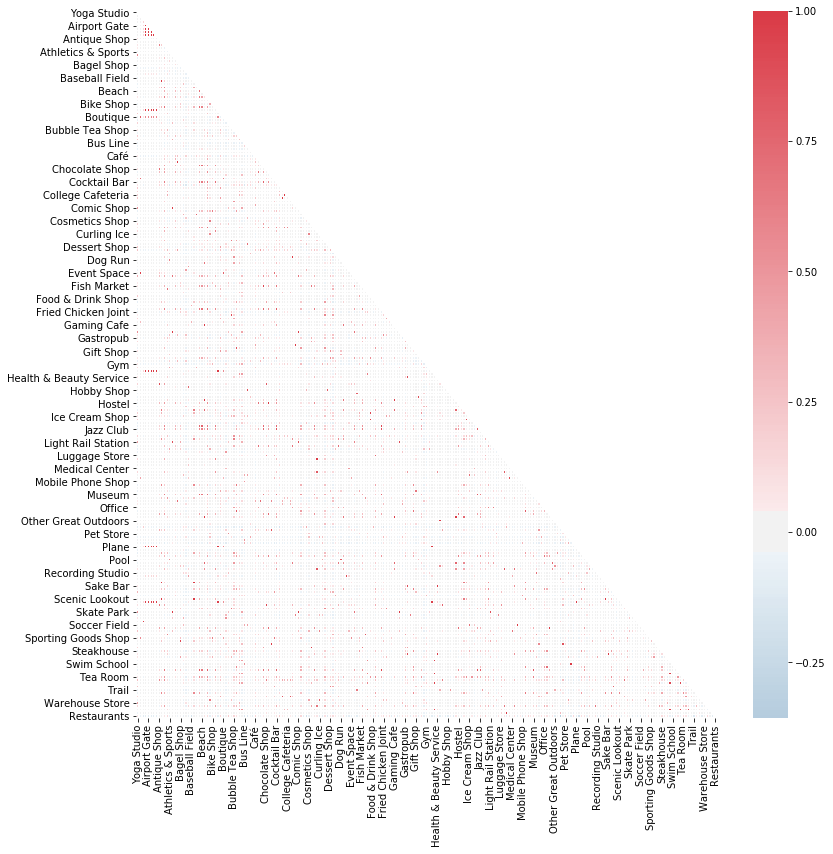

In [474]:
corr = toronto_grouped4.corr(method='pearson') 
#set fig size
fig, ax = plt.subplots(figsize=(13,13))
#plot matrix

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)# Plotting the heatmap
sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0)

In the previous we were able to see that there isn't any variable correlated with Restaurant.

In [348]:
corr

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Restaurants
Yoga Studio,1.000000,-0.032422,-0.037628,-0.032422,-0.032422,-0.032422,-0.032422,-0.032422,0.137821,-0.032422,...,0.278126,-0.056057,-0.056732,0.172972,-0.053624,0.454483,0.147548,0.037366,-0.039032,0.064753
Accessories Store,-0.032422,1.000000,-0.011723,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.013567,-0.010101,...,-0.017894,-0.020620,-0.017675,-0.016155,-0.016707,-0.010101,-0.030277,-0.016297,-0.012160,-0.053714
Airport,-0.037628,-0.011723,1.000000,0.164122,0.164122,0.164122,0.164122,0.164122,-0.015746,-0.011723,...,-0.020768,-0.023931,-0.020513,-0.018749,-0.019389,-0.011723,-0.035138,-0.018913,-0.014113,-0.115542
Airport Food Court,-0.032422,-0.010101,0.164122,1.000000,1.000000,1.000000,1.000000,1.000000,-0.013567,-0.010101,...,-0.017894,-0.020620,-0.017675,-0.016155,-0.016707,-0.010101,-0.030277,-0.016297,-0.012160,-0.099556
Airport Gate,-0.032422,-0.010101,0.164122,1.000000,1.000000,1.000000,1.000000,1.000000,-0.013567,-0.010101,...,-0.017894,-0.020620,-0.017675,-0.016155,-0.016707,-0.010101,-0.030277,-0.016297,-0.012160,-0.099556
Airport Lounge,-0.032422,-0.010101,0.164122,1.000000,1.000000,1.000000,1.000000,1.000000,-0.013567,-0.010101,...,-0.017894,-0.020620,-0.017675,-0.016155,-0.016707,-0.010101,-0.030277,-0.016297,-0.012160,-0.099556
Airport Service,-0.032422,-0.010101,0.164122,1.000000,1.000000,1.000000,1.000000,1.000000,-0.013567,-0.010101,...,-0.017894,-0.020620,-0.017675,-0.016155,-0.016707,-0.010101,-0.030277,-0.016297,-0.012160,-0.099556
Airport Terminal,-0.032422,-0.010101,0.164122,1.000000,1.000000,1.000000,1.000000,1.000000,-0.013567,-0.010101,...,-0.017894,-0.020620,-0.017675,-0.016155,-0.016707,-0.010101,-0.030277,-0.016297,-0.012160,-0.099556
Antique Shop,0.137821,-0.013567,-0.015746,-0.013567,-0.013567,-0.013567,-0.013567,-0.013567,1.000000,-0.013567,...,-0.024035,-0.027695,-0.023740,-0.021698,-0.022439,-0.013567,-0.040666,-0.021888,-0.016333,-0.017357
Aquarium,-0.032422,-0.010101,-0.011723,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.013567,1.000000,...,-0.017894,-0.020620,0.571489,-0.016155,-0.016707,-0.010101,0.167163,-0.016297,-0.012160,-0.011540


In [349]:
corr.loc[corr['Restaurants'] <= -0.2]

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Restaurants
Convenience Store,-0.072859,-0.02574,-0.029874,-0.02574,-0.02574,-0.02574,-0.02574,-0.02574,-0.034573,-0.025740,...,-0.045600,-0.052545,-0.045041,-0.041168,-0.042573,-0.025740,-0.056323,0.073301,-0.030988,-0.213887
Park,-0.081620,-0.04547,0.196820,-0.04547,-0.04547,-0.04547,-0.04547,-0.04547,-0.009303,-0.030289,...,-0.040783,0.181997,-0.070709,-0.072722,-0.003875,-0.005521,-0.103297,-0.060088,0.319500,-0.356217


In [350]:
import scipy
pearson_coef, p_value = scipy.stats.pearsonr(toronto_grouped3['Park'], toronto_grouped3['Restaurants'])
print(pearson_coef, p_value)


-0.3562168863650585 0.00027533747486019203


In [351]:
pearson_coef, p_value = scipy.stats.pearsonr(toronto_grouped3['Convenience Store'], toronto_grouped3['Restaurants'])
print(pearson_coef, p_value)

-0.21388651309733803 0.0326169203028298


In [352]:
corr.loc[corr['Restaurants'] >= 0.2]

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Restaurants
Brewery,0.185068,-0.026357,-0.030589,-0.026357,-0.026357,-0.026357,-0.026357,-0.026357,-0.035401,0.122706,...,0.033409,-0.048365,0.040824,-0.042154,-0.043593,-0.026357,0.135321,-0.042523,-0.031731,0.215383
Juice Bar,0.170016,-0.036199,-0.042012,-0.036199,-0.036199,-0.036199,-0.036199,-0.036199,-0.048621,0.078279,...,0.048244,-0.061364,0.003429,0.132661,-0.059872,-0.036199,0.231422,0.124799,0.023079,0.206076
Restaurants,0.064753,-0.053714,-0.115542,-0.099556,-0.099556,-0.099556,-0.099556,-0.099556,-0.017357,-0.011540,...,0.039013,-0.127203,0.053604,0.040599,-0.098491,0.016255,0.141269,-0.038320,-0.095214,1.000000


In [353]:
pearson_coef, p_value = scipy.stats.pearsonr(toronto_grouped3['Brewery'], toronto_grouped3['Restaurants'])
print(pearson_coef, p_value)

0.21538295634835827 0.03139130425282927


In [354]:
pearson_coef, p_value = scipy.stats.pearsonr(toronto_grouped3['Juice Bar'], toronto_grouped3['Restaurants'])
print(pearson_coef, p_value)

0.20607578339182814 0.039687862628707986


Let's clean some more NaN.

In [439]:
# clean NaN
toronto_merged.dropna(axis=0, inplace=True)

And here we will visualize the locations of current Restaurants.

In [391]:
# Finally, let's visualize the restaurants.

import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, venue in zip(df_restaurant['VenueLat'], df_restaurant['VenueLong'], df_restaurant['Neighborhood'], df_restaurant['Venue']):
    label = folium.Popup(str(poi) + 'Restaurant' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[int(venue)],
        fill=True,
        #fill_color=rainbow[int(venue)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's visualize the Neighbourhoods recommended for the new restaurant.

In [398]:
df_outer.shape

(99, 5)

In [405]:
table.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [475]:
table.rename(columns={'Neighbourhood':'Neighborhood',}, inplace=True)

In [476]:
df_merge2 = pd.merge(df_outer, table, on="Neighborhood" )

In [477]:
df_coordinates.rename(columns={'Postal Code':'Postcode'}, inplace=True)
df_merge3 = pd.merge(df_merge2, df_coordinates, on="Postcode" )

In [478]:
df_merge3 = df_merge3.head(10)
df_merge3

,Neighborhood,Restaurants,Other_Venues,Rate+1,Postcode,Borough,Latitude,Longitude
0,"CN Tower, Bathurst Quay, Island airp...",0.0,17.0,17.00,M5V,Downtown Toronto,43.628947,-79.394420
1,"Alderwood, Long Branch",0.0,10.0,10.00,M8W,Etobicoke,43.602414,-79.543484
2,"Clairlea, Golden Mile, Oakridge",0.0,10.0,10.00,M1L,Scarborough,43.711112,-79.284577
3,"Bloordale Gardens, Eringate, Marklan...",0.0,8.0,8.00,M9C,Etobicoke,43.643515,-79.577201
4,"Dovercourt Village, Dufferin",1.0,16.0,8.00,M6H,West Toronto,43.669005,-79.442259
5,Woodbine Heights,0.0,8.0,8.00,M4C,East York,43.695344,-79.318389
6,Leaside,3.0,29.0,7.25,M4G,East York,43.709060,-79.363452
7,Willowdale West,0.0,7.0,7.00,M2R,North York,43.782736,-79.442259
8,Davisville North,0.0,7.0,7.00,M4P,Central Toronto,43.712751,-79.390197
9,"Kingsway Park South West, Mimico NW,...",1.0,14.0,7.00,M8Z,Etobicoke,43.628841,-79.520999


In [453]:
# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, rate in zip(df_merge3['Latitude'], df_merge3['Longitude'], df_merge3['Neighborhood'], df_merge3['Rate']):
    label = folium.Popup(str(poi) + 'Rate' + str(rate), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        #color=rainbow[int(venue)],
        fill=True,
        #fill_color=rainbow[int(venue)],
        fill_opacity=0.7).add_to(map_clusters2)
    
       
map_clusters2